# Random Forests

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import sklearn.ensemble
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

datapath = '../../../data/'
processed_datapath = datapath + 'processed/'

def plot_feature_importances(model, features):
    # Plot feature importance
    feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(16,9))
    plt.subplot(111)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, [features[x] for x in sorted_idx])
    plt.xlabel('Relative Importance')

In [2]:
KaggleMatchup = pandas.read_csv(processed_datapath + 'Matchup.csv')
KenpomMatchup = pandas.read_csv(processed_datapath + 'Matchup_KP.csv')

WinsLosses_features = ['Wins', 'Losses']
kaggle_features = ['FieldGoalAvg', 'ThreePointAvg', 'FreeThrowAvg', 'ReboundAvg', 'AssistAvg', 
                   'TurnOverAvg', 'StealAvg', 'BlockAvg', 'PersonalFoulAvg']
kenpom_features = ['Pyth', 'AdjustO', 'AdjustD', 'AdjustT', 'Luck']

rforest_params = {'n_estimators':[10, 50, 100, 500, 1000], 
                  'max_features':[None, 'auto', 'sqrt', 'log2'], 
                  'random_state':[42],
                  'n_jobs':[4]}

xrforest_params = {'n_estimators':[10, 50, 100, 500, 1000], 
                   'max_features':[None, 'auto', 'sqrt', 'log2'], 
                   'random_state':[42],
                   'n_jobs':[4]}


# Random Forest Feature Importances
## Kaggle

MSE: 0.2280


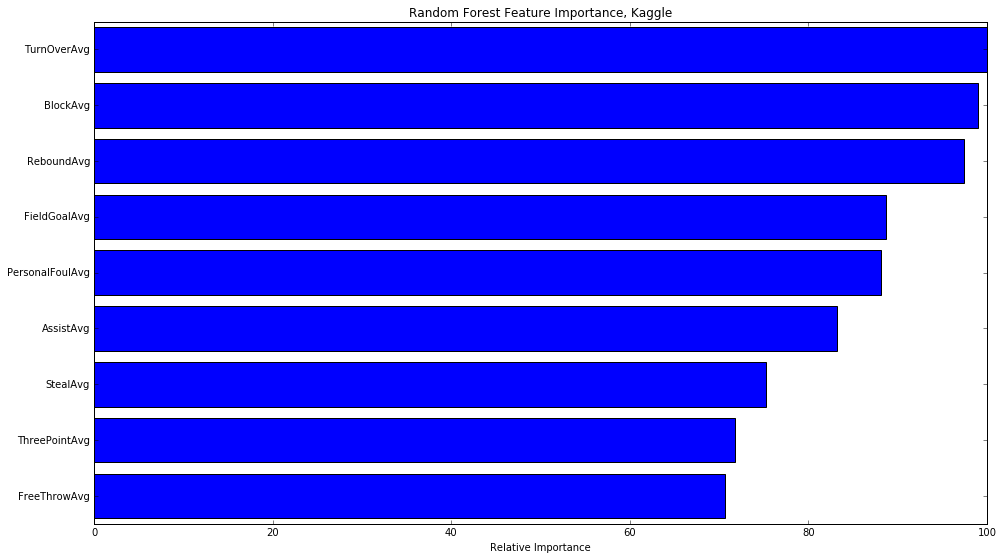

In [3]:
features_named = [x for x in kaggle_features]
X = KenpomMatchup[kaggle_features]
y = KenpomMatchup.WinLoss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = sklearn.ensemble.RandomForestRegressor()
grid = GridSearchCV(model, rforest_params, cv=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)
plot_feature_importances(model, features_named)
plt.title('Random Forest Feature Importance, Kaggle')

# Random Forest Feature Importances
## Kenpom

MSE: 0.1680


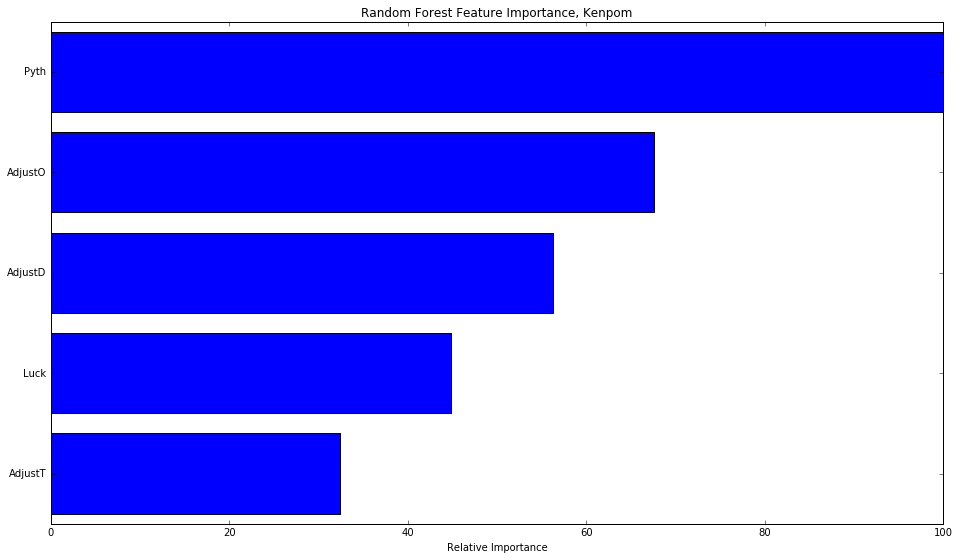

In [4]:
features_named = [x for x in kenpom_features]
X = KenpomMatchup[kenpom_features]
y = KenpomMatchup.WinLoss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = sklearn.ensemble.RandomForestRegressor()
grid = GridSearchCV(model, rforest_params, cv=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)
plot_feature_importances(model, features_named)
plt.title('Random Forest Feature Importance, Kenpom')

# Random Forest Feature Importances
## Kaggle + Kenpom

MSE: 0.1656


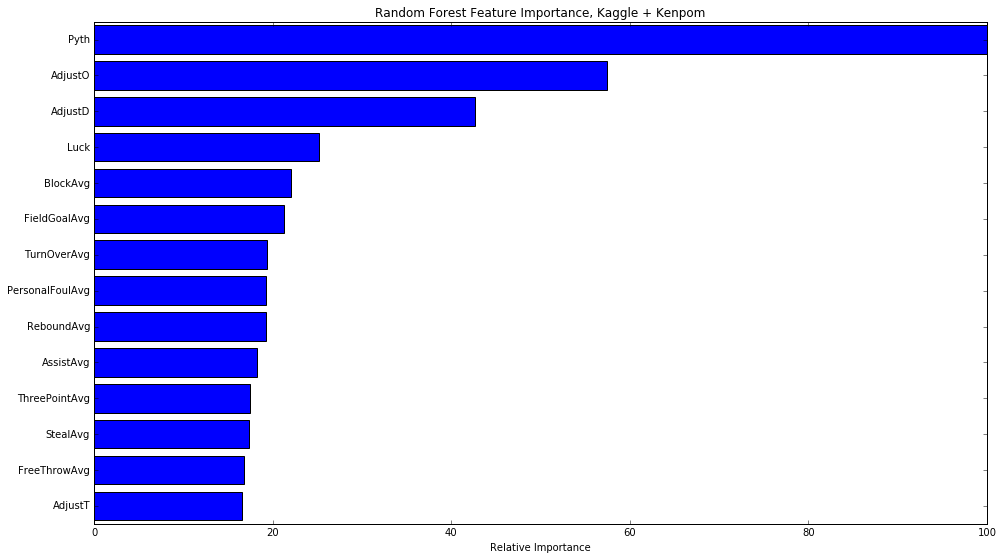

In [5]:
features_named = [x for x in kaggle_features + kenpom_features]
X = KenpomMatchup[kaggle_features + kenpom_features]
y = KenpomMatchup.WinLoss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = sklearn.ensemble.RandomForestRegressor()
grid = GridSearchCV(model, rforest_params, cv=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)
plot_feature_importances(model, features_named)
plt.title('Random Forest Feature Importance, Kaggle + Kenpom')

# Extra Trees Regressor
## Kaggle

MSE: 0.2282


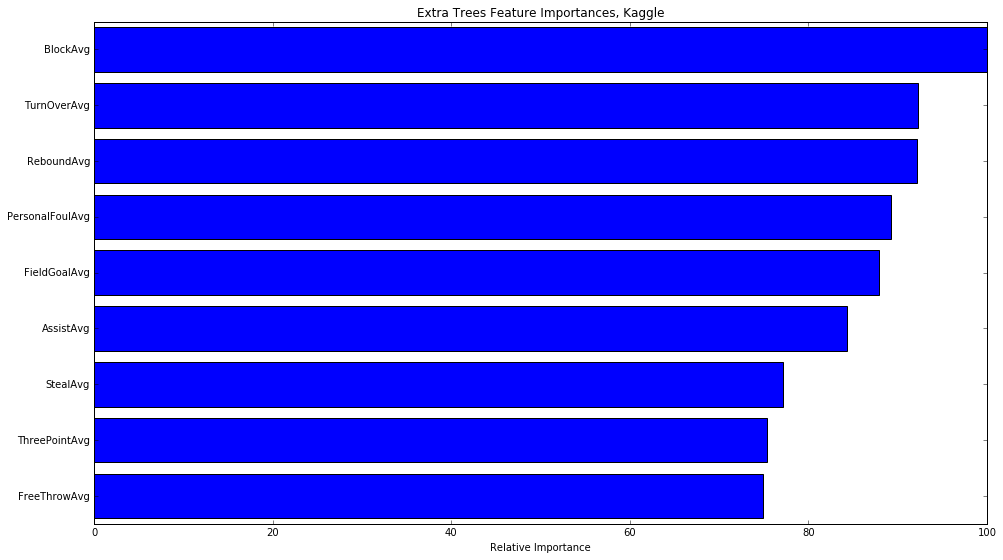

In [6]:
features_named = [x for x in kaggle_features]
X = KenpomMatchup[kaggle_features]
y = KenpomMatchup.WinLoss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = sklearn.ensemble.ExtraTreesRegressor()
grid = GridSearchCV(model, xrforest_params, cv=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)
plot_feature_importances(model, features_named)
plt.title('Extra Trees Feature Importances, Kaggle')

# Extra Trees
## Kenpom

MSE: 0.1637


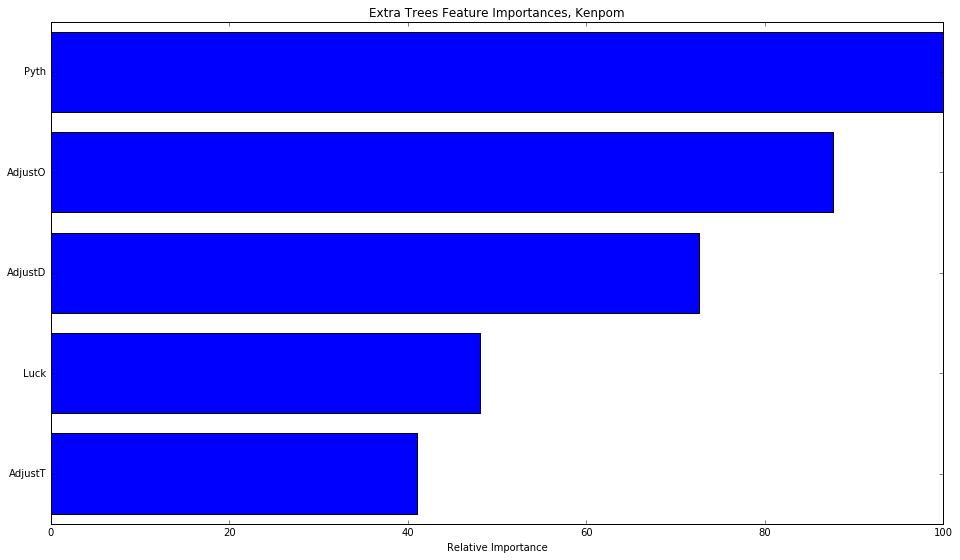

In [7]:
features_named = [x for x in kenpom_features]
X = KenpomMatchup[kenpom_features]
y = KenpomMatchup.WinLoss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = sklearn.ensemble.ExtraTreesRegressor()
grid = GridSearchCV(model, xrforest_params, cv=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)
plot_feature_importances(model, features_named)
plt.title('Extra Trees Feature Importances, Kenpom')

# Extra Trees
## Kaggle + Kenpom

MSE: 0.1634


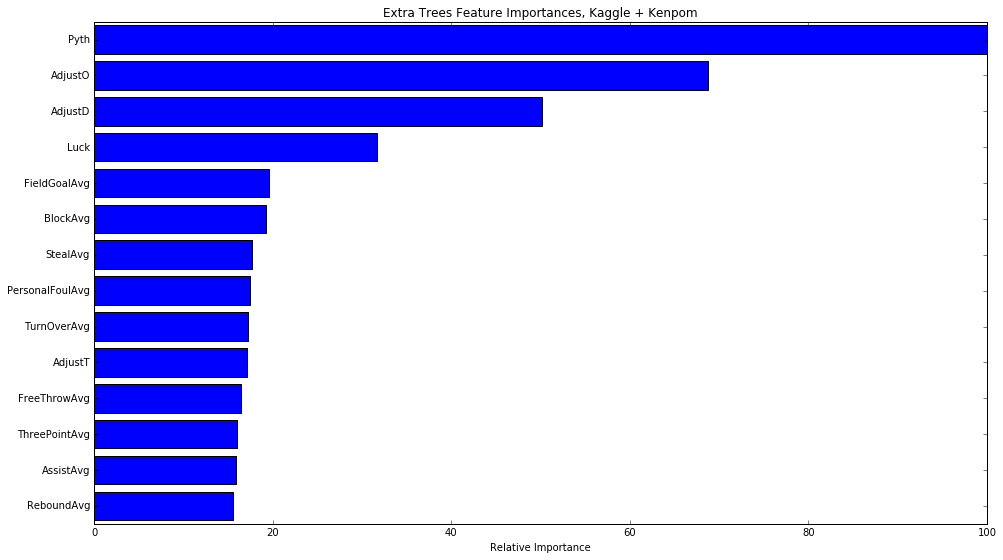

In [8]:
features_named = [x for x in kaggle_features + kenpom_features]
X = KenpomMatchup[kaggle_features + kenpom_features]
y = KenpomMatchup.WinLoss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = sklearn.ensemble.ExtraTreesRegressor()
grid = GridSearchCV(model, xrforest_params, cv=3)
grid.fit(X_train, y_train)
model = grid.best_estimator_
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: %.4f" % mse)
plot_feature_importances(model, features_named)
plt.title('Extra Trees Feature Importances, Kaggle + Kenpom')